<a href="https://colab.research.google.com/github/sanjaykumar545/RoadSafe-Analytics/blob/main/milestone1/week1/day4/Eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import seaborn as sns
ds=pd.read_csv('/content/drive/MyDrive/Infosys Internship/US_Accidents_March23.csv')

In [8]:
import matplotlib.pyplot as plt

In [6]:
# Convert coordinates to numeric (if not already)
ds['Start_Lat'] = pd.to_numeric(ds['Start_Lat'], errors='coerce')
ds['Start_Lng'] = pd.to_numeric(ds['Start_Lng'], errors='coerce')

# Drop rows with missing coordinates for geospatial analysis
geo_df = ds.dropna(subset=['Start_Lat', 'Start_Lng'])

print(f"Number of records with valid coordinates: {geo_df.shape[0]}")

Number of records with valid coordinates: 7728394


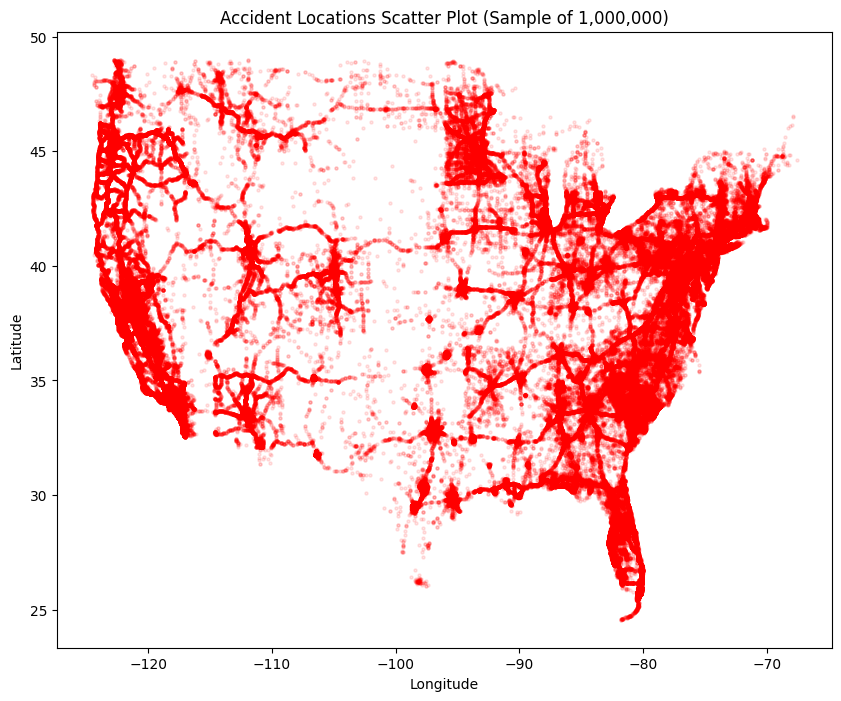

In [9]:
plt.figure(figsize=(10, 8))
sample_df = geo_df.sample(n=1000000, random_state=42)  # sampling for performance
plt.scatter(sample_df['Start_Lng'], sample_df['Start_Lat'], alpha=0.1, s=5, c='red')
plt.title('Accident Locations Scatter Plot (Sample of 1,000,000)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/tmp/ipython-input-2400102595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis')


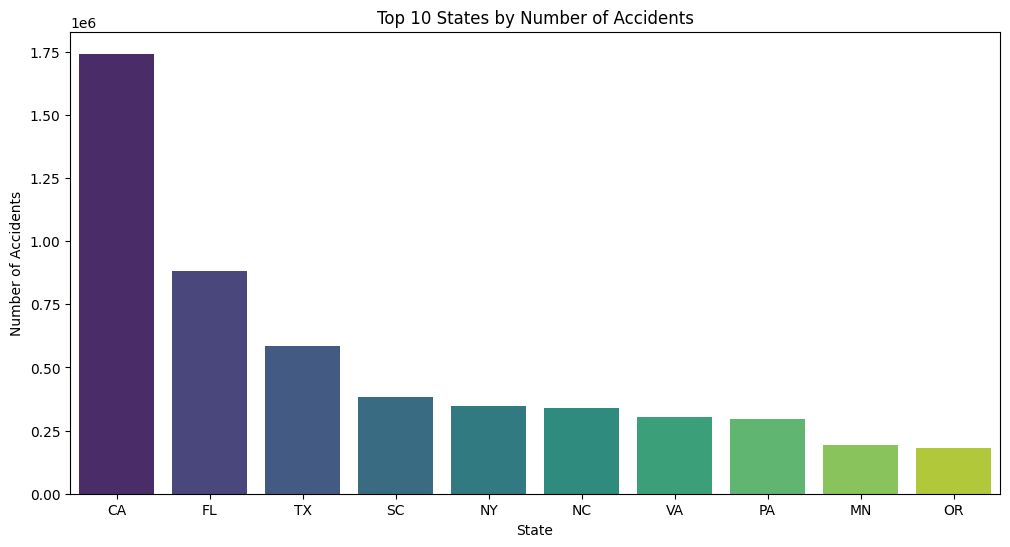

In [17]:

state_counts = geo_df['State'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis')
plt.title('Top 10 States by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('State')
plt.show()


/tmp/ipython-input-3294789569.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')


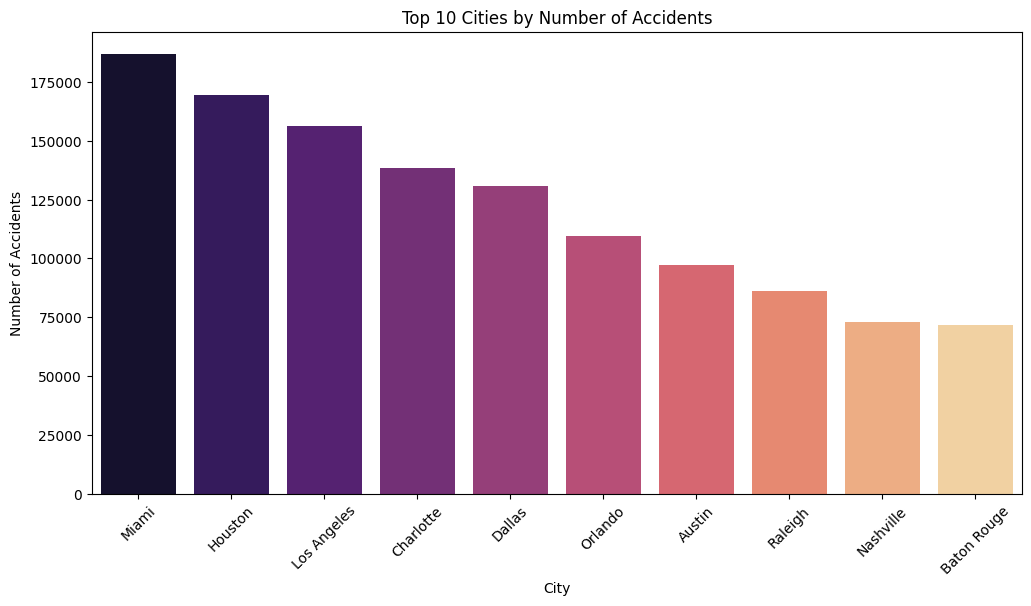

In [20]:
# Density map by City (accident count for top 10 cities)
city_counts = geo_df['City'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')
plt.title('Top 10 Cities by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

In [21]:
# 4. Highlight top 5 most accident-prone states and cities
top_5_states = state_counts.head(5)
top_5_cities = city_counts.head(5)

print("Top 5 Accident-Prone States:")
print(top_5_states)

print("\nTop 5 Accident-Prone Cities:")
print(top_5_cities)

Top 5 Accident-Prone States:
State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
Name: count, dtype: int64

Top 5 Accident-Prone Cities:
City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Name: count, dtype: int64


Q1. What is the distribution of accidents by Hour of the Day?

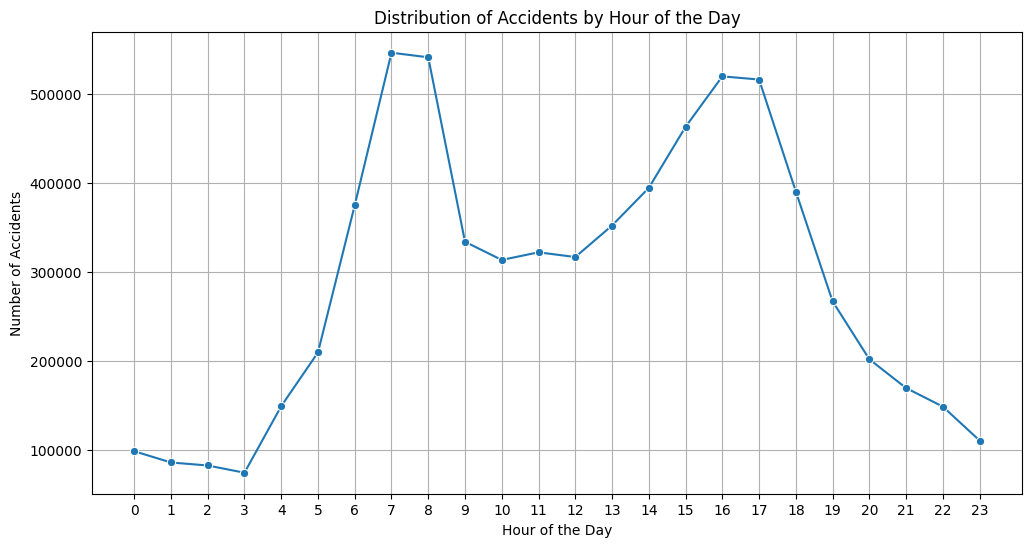

In [22]:

ds['Start_Time'] = pd.to_datetime(ds['Start_Time'], errors='coerce')
ds['Hour'] = ds['Start_Time'].dt.hour
hourly_counts = ds['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Distribution of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

Q2.  How does accident severity distribute across different States?

<Figure size 1500x800 with 0 Axes>

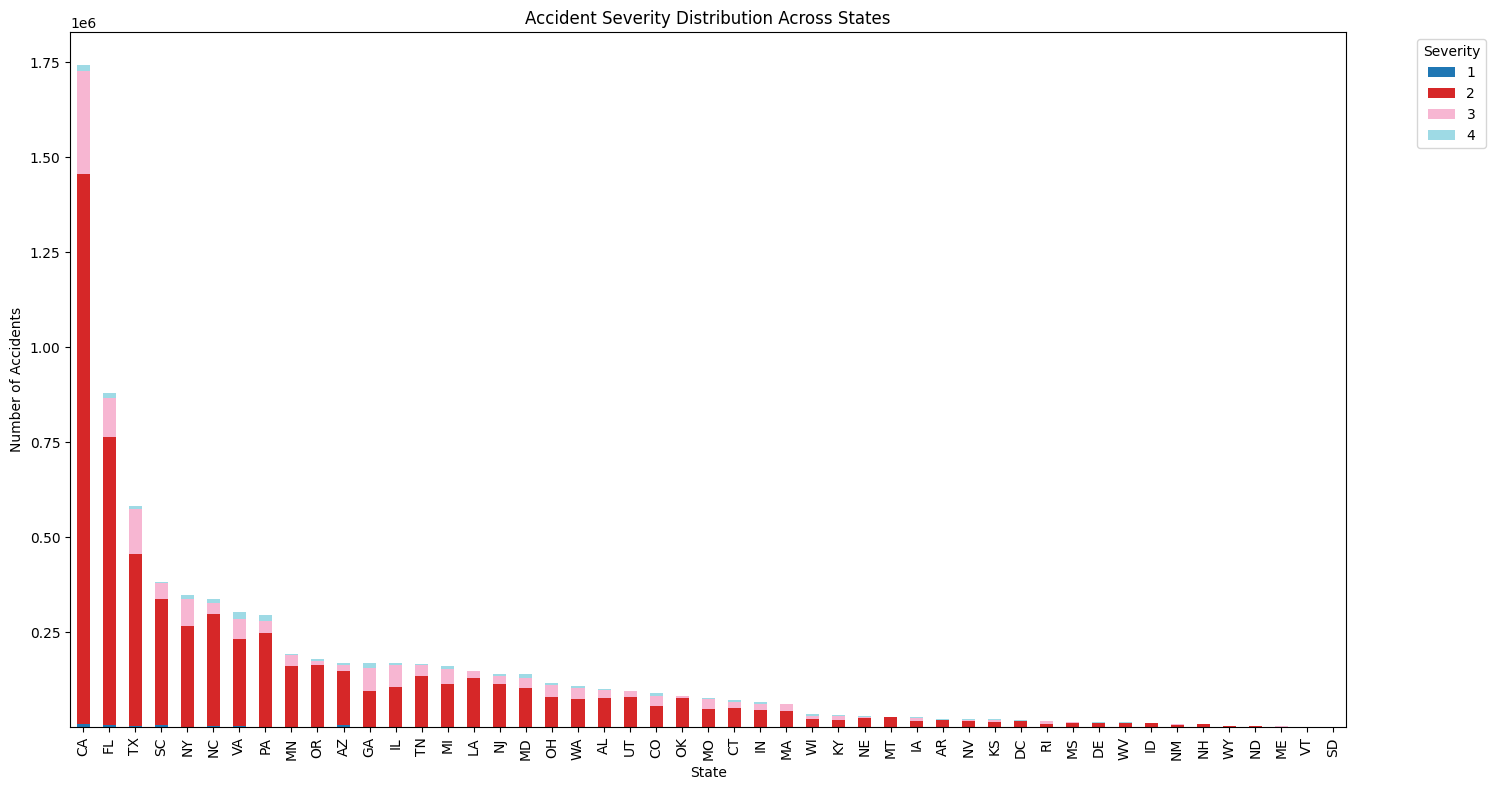

In [23]:

severity_state_counts = ds.groupby(['State', 'Severity']).size().unstack(fill_value=0)

severity_state_counts = severity_state_counts.loc[severity_state_counts.sum(axis=1).sort_values(ascending=False).index]
plt.figure(figsize=(15, 8))
severity_state_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 8))
plt.title('Accident Severity Distribution Across States')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Q3. What weather conditions are associated with the highest accident severity?

<Figure size 1500x800 with 0 Axes>

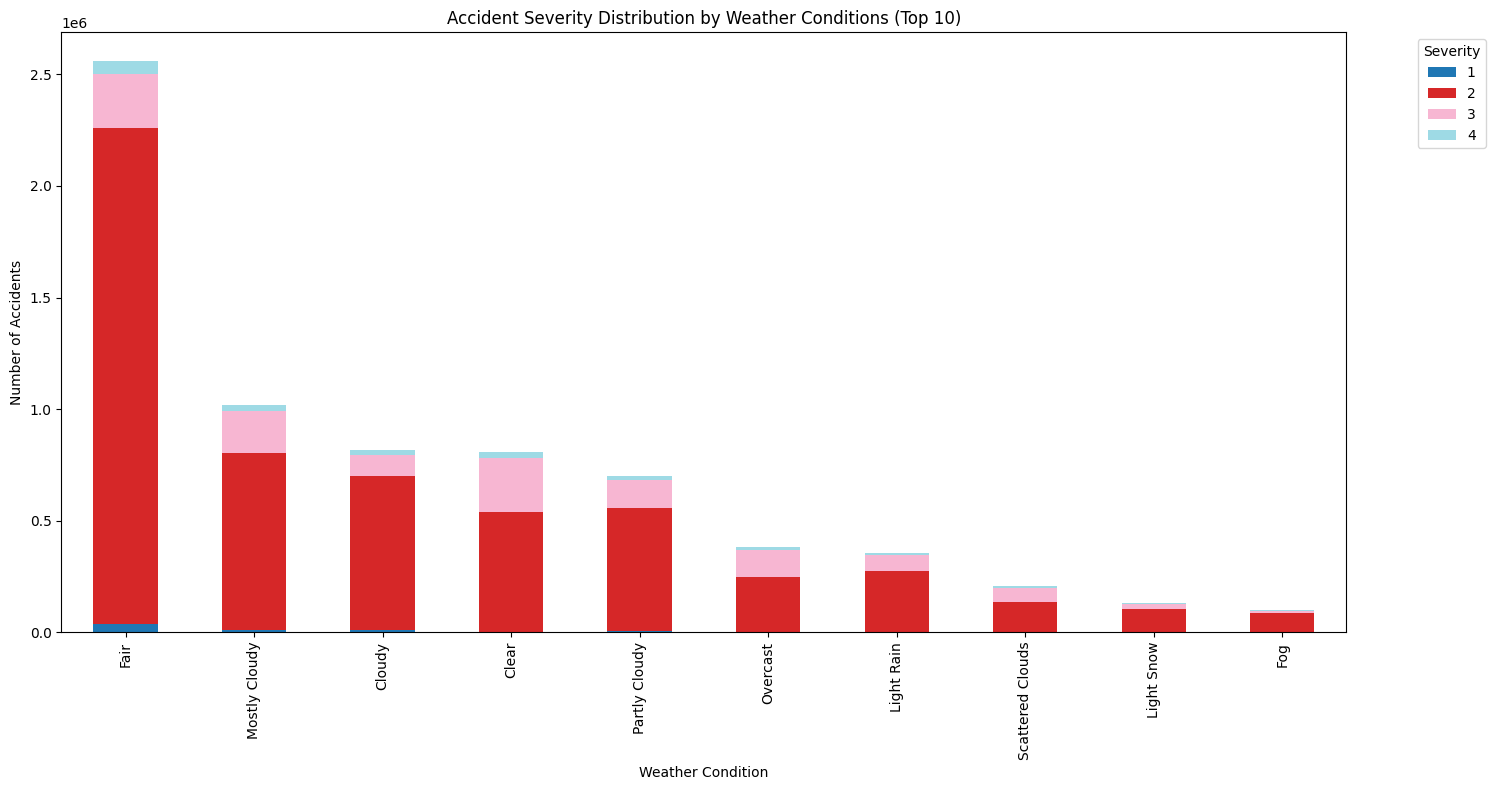

In [24]:
weather_severity_counts = ds.groupby(['Weather_Condition', 'Severity']).size().unstack(fill_value=0)
top_weather_conditions = weather_severity_counts.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_weather_severity = weather_severity_counts.loc[top_weather_conditions]
plt.figure(figsize=(15, 8))
filtered_weather_severity.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 8))
plt.title('Accident Severity Distribution by Weather Conditions (Top 10)')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Q4. How many accidents occur during day vs night? (Sunrise_Sunset column)

/tmp/ipython-input-367769369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_night_counts.index, y=day_night_counts.values, palette='coolwarm')


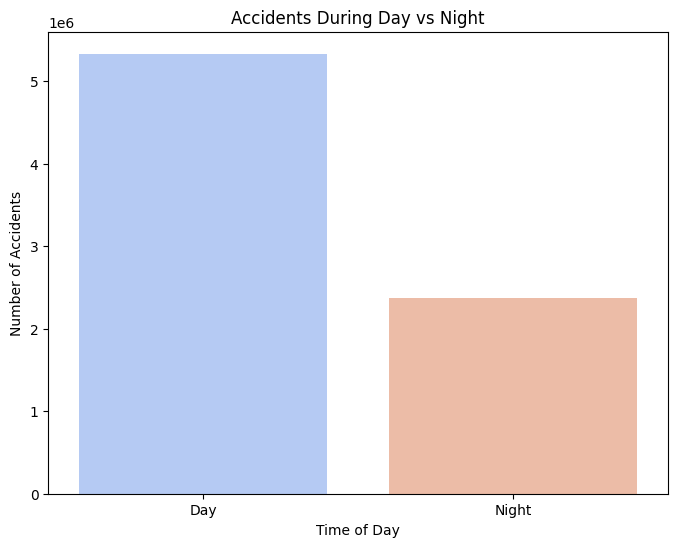

In [25]:

day_night_counts = ds['Sunrise_Sunset'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=day_night_counts.index, y=day_night_counts.values, palette='coolwarm')
plt.title('Accidents During Day vs Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

Q5. Distribution of accidents on different days of the week

/tmp/ipython-input-2287801435.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Set2')


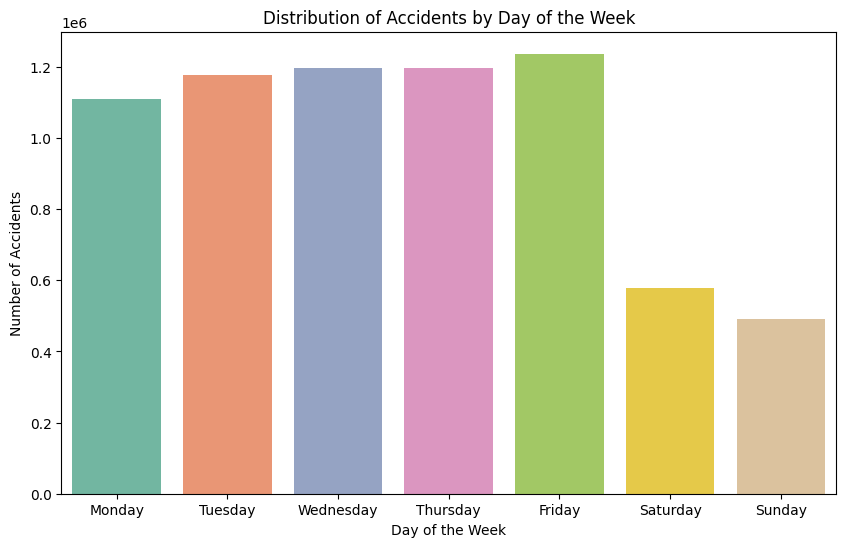

In [26]:

ds['Day_of_Week'] = ds['Start_Time'].dt.day_name()
day_of_week_counts = ds['Day_of_Week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Set2')
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

Q6. Are certain traffic features (e.g., Traffic Signal, Stop, Crossing) associated with accident counts?

/tmp/ipython-input-3418155484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')


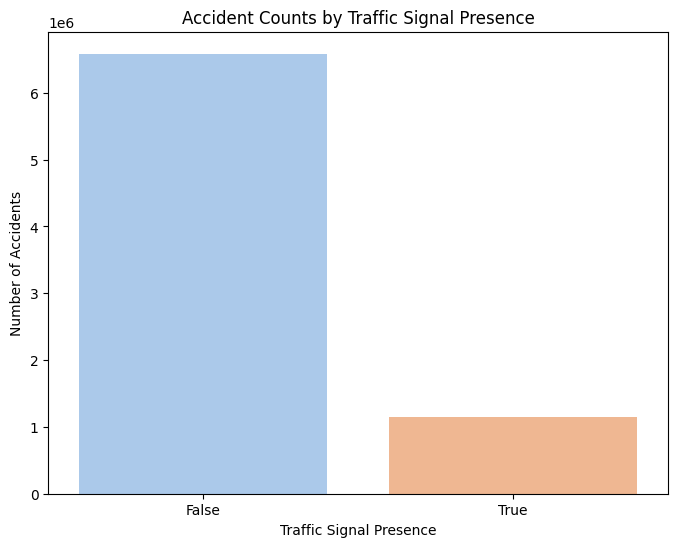

/tmp/ipython-input-3418155484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')


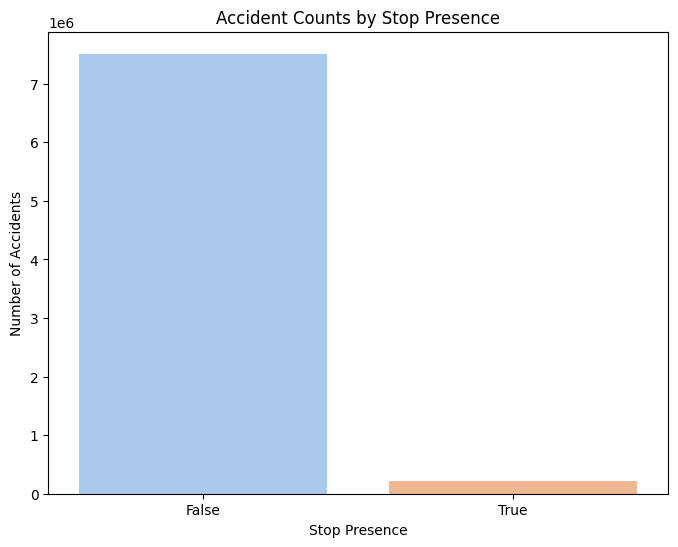

/tmp/ipython-input-3418155484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')


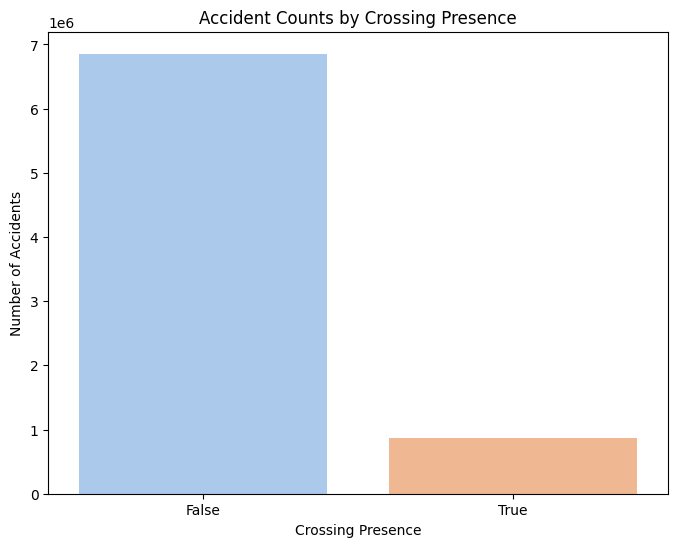

In [27]:
traffic_features = ['Traffic_Signal', 'Stop', 'Crossing']
traffic_feature_counts = {feature: ds[feature].value_counts() for feature in traffic_features}

for feature, counts in traffic_feature_counts.items():
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')
    plt.title(f'Accident Counts by {feature.replace("_", " ")} Presence')
    plt.xlabel(f'{feature.replace("_", " ")} Presence')
    plt.ylabel('Number of Accidents')
    plt.show()